<a href="https://colab.research.google.com/github/bonareri/AI-Powered-Fraud-Detection-System/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Fraud detection using the credit card transaction dataset**

##**1. Project Goals**

- Build a machine learning model to detect fraudulent transactions from a dataset of anonymized credit card transactions.
- Address the challenge of imbalanced datasets through sampling techniques.
- Evaluate model performance using metrics suitable for imbalanced datasets, like the **(Area Under the Precision-Recall Curve (AUPRC).**

### Importing Libraries

In [1]:
# Impoting general libraries
# import warnings
# import itertools
# import random

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and sampling
from sklearn.pipeline import make_pipeline
from collections import Counter
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, PolynomialFeatures

# Class Imbalance
from imblearn.over_sampling import SMOTE

# CV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

# Model building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

# Metrics
from sklearn.metrics import classification_report, precision_recall_curve, roc_auc_score, f1_score, confusion_matrix

##**2. Exploratory Data Analysis (EDA)**

### Dataset Overview

In [2]:
#Loading the dataset
df = pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Understand Data Distribution

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Check for Missing Values

In [9]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


### Check for Duplicates

In [6]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates
fraud_detection = df.drop_duplicates()

Number of duplicate rows: 1081


### Class Distribution (Fraud vs Non-Fraud Transactions)

In [20]:
# Count the occurrences of each class
class_counts = df['Class'].value_counts()
print(class_counts)

Class
0    284315
1       492
Name: count, dtype: int64


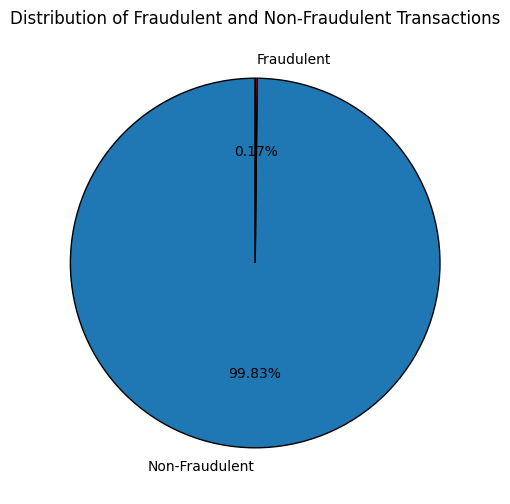

In [21]:
# Define labels and sizes
labels = ['Non-Fraudulent', 'Fraudulent']
sizes = [class_counts[0], class_counts[1]]
colors = ['#1f77b4', '#ff0000']  # Blue for non-fraud, Bright red for fraud

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.show()

#### **Class Imbalance Insights**

- The dataset is highly imbalanced, with **284,315 non-fraudulent transactions** and only **492 fraudulent transactions**.
- Fraudulent transactions make up **only 0.17%** of the total dataset, making fraud detection a challenging task.
- The extreme imbalance can lead to biased models that favor the majority class (non-fraudulent transactions).
- Standard machine learning models may **fail to detect fraud** effectively due to this imbalance.
- To address this, techniques like **oversampling the minority class (SMOTE), undersampling the majority class, or using weighted loss functions** may be required to improve model performance.


### Transaction Amount Distribution

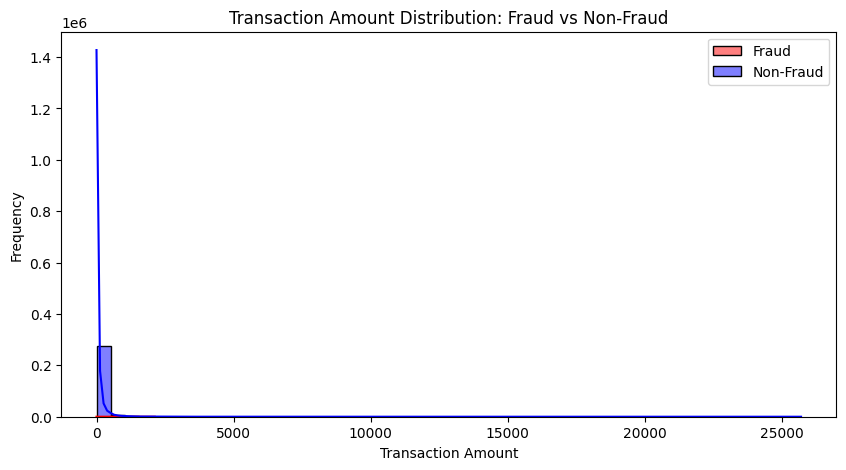

In [36]:
plt.figure(figsize=(10, 5))
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, color='red', label='Fraud', kde=True)
sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, color='blue', label='Non-Fraud', kde=True)
plt.legend()
plt.title("Transaction Amount Distribution: Fraud vs Non-Fraud")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

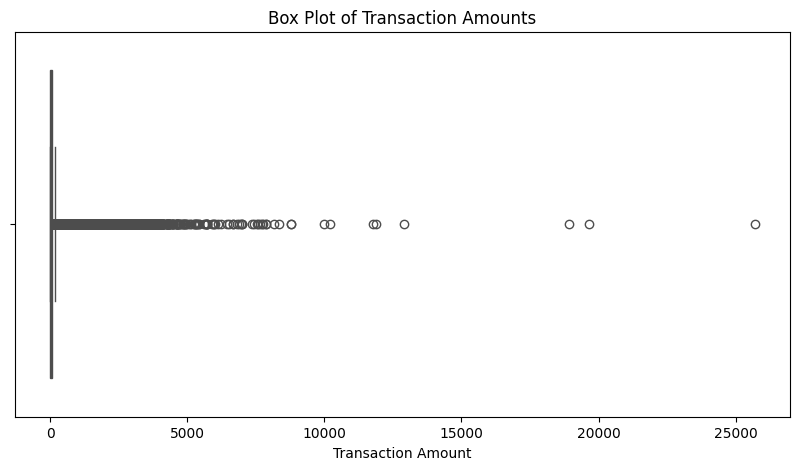

In [42]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Amount'], color='blue')

plt.xlabel("Transaction Amount")
plt.title("Box Plot of Transaction Amounts")
plt.show()

#### Insights from the Box Plot of Transaction Amounts

- The majority of transactions are concentrated at lower amounts, while a few transactions have extremely high values.
- A significant number of outliers exist, suggesting rare but high-value transactions. These could indicate anomalies or potential fraudulent activities.
- The distribution appears to be **highly skewed**, meaning that most transactions are of smaller amounts with a long tail of larger transactions.




### Identify Outliers

In [30]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]
print(outliers)

            Time        V1        V2        V3        V4        V5        V6  \
2            1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
20          16.0  0.694885 -1.361819  1.029221  0.834159 -1.191209  1.309109   
51          36.0 -1.004929 -0.985978 -0.038039  3.710061 -6.631951  5.122103   
64          42.0 -0.522666  1.009923  0.276470  1.475289 -0.707013  0.355243   
85          55.0 -4.575093 -4.429184  3.402585  0.903915  3.002224 -0.491078   
...          ...       ...       ...       ...       ...       ...       ...   
284735  172727.0 -1.661169 -0.565425  0.294268 -1.549156 -2.301359  2.365956   
284748  172738.0  1.634178 -0.486939 -1.975967  0.495364  0.263635 -0.713049   
284753  172743.0  1.465737 -0.618047 -2.851391  1.425282  0.893893 -0.958325   
284757  172745.0 -1.757643 -0.982659  1.091540 -1.409539 -0.662159  0.046930   
284806  172792.0 -0.533413 -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9  .

### Check how many outliers are fraudulent

In [33]:
outliers_fraud = outliers[outliers['Class'] == 1]
outliers_non_fraud = outliers[outliers['Class'] == 0]

print(f"Fraudulent outliers: {len(outliers_fraud)}")
print(f"Non-fraudulent outliers: {len(outliers_non_fraud)}")

Fraudulent outliers: 91
Non-fraudulent outliers: 31813


### Compare the transaction amounts of fraud vs non-fraud transactions

In [34]:
print("Fraudulent Transactions Summary:")
print(df[df['Class'] == 1]['Amount'].describe())

print("\nNon-Fraudulent Transactions Summary:")
print(df[df['Class'] == 0]['Amount'].describe())

Fraudulent Transactions Summary:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Non-Fraudulent Transactions Summary:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


### Insights from the Transaction Amount Analysis  

#### Fraudulent Transactions Tend to Have Higher Median Amounts  
- The **median** transaction amount for fraudulent transactions is **9.25**, whereas for non-fraudulent transactions, it's **22.00**.  
- This suggests that fraudsters often process **lower amounts** on average to avoid detection.  

#### Fraudulent Transactions Have a Much Lower Maximum Value  
- The **highest** fraudulent transaction amount is **2,125.87**, while for non-fraudulent transactions, it's **25,691.16**.  
- This implies that **extreme high-value transactions are usually legitimate** rather than fraudulent.  

#### Fraudulent Transactions Have a Higher Standard Deviation Relative to Their Mean  
- **Std for fraud:** 256.68, **Std for non-fraud:** 250.10  
- Even though both groups have similar standard deviations, fraudulent transactions have a **higher variance relative to their mean** (122.21 for fraud vs. 88.29 for non-fraud).  
- This suggests that fraud transactions are **more dispersed**, making them harder to detect using simple threshold-based methods.  

#### Fraudulent Transactions Are More Concentrated in the Lower Ranges  
- **75% of fraudulent transactions** are below **105.89**, while for non-fraudulent transactions, **75% are below 77.05**.  
- This indicates that **most fraud occurs in relatively small amounts**, likely an attempt to bypass security measures.  


### Investigating Outliers for Potential Fraud

In [37]:
fraud_outliers = df[(df['Class'] == 1) & (df['Amount'] > 105.89)]  # Above Q3 for fraud
print(f"Fraudulent outliers: {len(fraud_outliers)}")

Fraudulent outliers: 122


### Insights on Fraudulent Outliers

**Total Number of Fraudulent Outliers**
- The dataset contains **122 fraudulent transactions** with amounts greater than **105.89**, which places them above the **third quartile (Q3)** of fraud cases.

### Fraud Detection Implications
- Since **most fraud cases are below 105.89**, security measures might be tuned for smaller fraudulent amounts.
- These **outliers could represent riskier or more aggressive fraud attempts**, requiring closer inspection.
- Implementing **dynamic thresholding** rather than fixed cutoffs could improve fraud detection.

### Next Steps
- **Analyzing timestamps**: Are these high-value frauds happening at specific times (e.g., late nights, weekends)?
- **Looking at account behavior**: Are these transactions linked to new or flagged accounts?
- **Checking transaction locations**: Do they originate from unusual locations or IP addresses?



### Analyzing Transaction Time Patterns

#### Convert 'Time' to Readable Format
- The Time column in the dataset represents the number of seconds elapsed since the first transaction. We need to convert this into hours of the day.

In [43]:
df['Hour'] = (df['Time'] // 3600) % 24  # Convert seconds to hours

#### Filter High-Value Fraud Transactions

In [44]:
fraud_outliers = df[(df['Class'] == 1) & (df['Amount'] > 105.89)]

#### Analyzing Fraud Distribution by Hour
- checking if high-value fraud transactions peak at certain times.

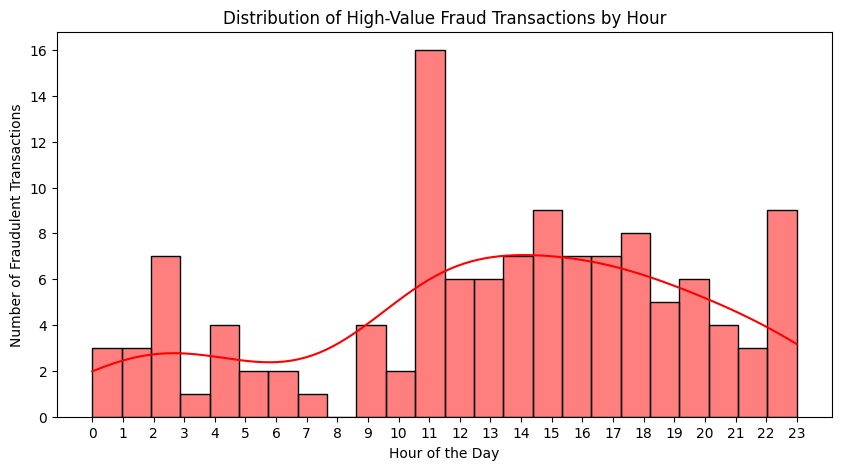

In [45]:
plt.figure(figsize=(10,5))
sns.histplot(fraud_outliers['Hour'], bins=24, kde=True, color='red')
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Distribution of High-Value Fraud Transactions by Hour")
plt.xticks(range(0, 24))
plt.show()

### Insights from the Distribution of High-Value Fraud Transactions by Hour  

#### 1. Fraud Peaks at 11 AM  
- A **sharp spike** in fraudulent transactions occurs around **11 AM**, suggesting fraudsters may be exploiting increased transaction activity during business hours.  

#### 2. Fraud is Spread Throughout the Day, with Some Night Activity  
- Fraudulent transactions are **not limited to business hours**; there is a **noticeable presence between midnight and 4 AM**.  
- Late-night fraud may indicate attempts to exploit reduced security monitoring during off-hours.  

#### 3. Another Spike Around Late Evening (10-11 PM)  
- There is a secondary **increase in fraud cases around 10-11 PM**, possibly targeting times when users are less likely to notice suspicious transactions.  

#### 4. Low Activity Between 6 AM - 9 AM  
- **Significantly lower fraud activity** is observed in the early morning hours, possibly because fewer transactions happen at this time, making fraudulent attempts more detectable.  

#### Next Steps for Further Investigation  
- **Comparing Fraudulent vs. Legitimate Transactions:** Identify if non-fraudulent transactions also peak at the same times.  



### Comparing Fraudulent vs. Legitimate Transactions

In [49]:
# Filter non-fraudulent transactions above Q3 (75th percentile)
high_value_non_fraud = df[(df['Class'] == 0) & (df['Amount'] > 77.05)]

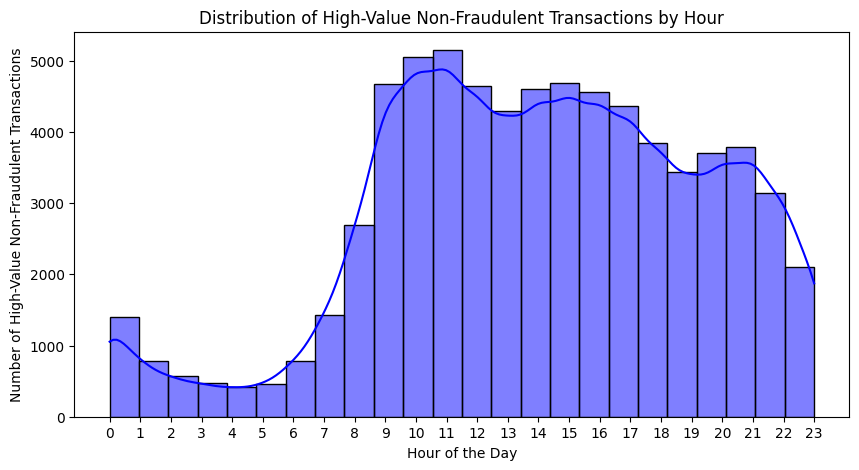

In [50]:
plt.figure(figsize=(10, 5))
sns.histplot(high_value_non_fraud['Hour'], bins=24, kde=True, color='blue')

# Labels & Title
plt.xlabel("Hour of the Day")
plt.ylabel("Number of High-Value Non-Fraudulent Transactions")
plt.title("Distribution of High-Value Non-Fraudulent Transactions by Hour")
plt.xticks(range(0, 24))
plt.show()

### **Insights from Hourly Distribution of High-Value Transactions**  

#### **Non-Fraudulent Transactions**  
- The distribution follows a **typical business cycle**, with **peaks between 9 AM - 1 PM** and a gradual decline afterward.  
- The highest number of transactions occurs at **11 AM**, suggesting that legitimate transactions are most frequent during normal working hours.  
- A **secondary peak** appears in the evening (around **6 PM - 8 PM**), possibly due to after-work financial activities.  
- Minimal transactions occur **between 2 AM - 6 AM**, aligning with expected human behavior (low activity at night).  

#### **Fraudulent Transactions (Compared to Non-Fraudulent Ones)**  
- Fraudulent transactions **do not strictly follow business hours**; instead, they are **more scattered across the day**.  
- **A distinct spike at 11 AM** is visible in both fraud and non-fraud cases, meaning fraudsters may be **blending their activity into peak transaction times** to avoid detection.  
- Unlike non-fraudulent transactions, fraud cases show **higher activity late at night (past 10 PM - 2 AM)**, possibly exploiting reduced monitoring.  
- Fraud transactions are **less concentrated in the evening peak (6 PM - 8 PM)** compared to non-fraudulent ones.  

### **Recommendations**  
**Fraud Detection Improvement**:  
- Security teams should **pay close attention to transactions occurring late at night**, as fraudulent activity remains **elevated beyond normal business hours**.   

**Transaction Monitoring Adjustments**:  
- While **11 AM peaks for both fraud and non-fraud cases**, fraudsters likely exploit this **to hide within legitimate transaction volumes**.  
- Special attention should be given to high-value transactions **outside of regular business peaks**, particularly those occurring in the **late-night hours**.  


**NB** : Scaling Effects in Visualization

- Since the fraudulent transactions range in the tens (e.g., 10-20 per hour), the y-axis scale for the fraud plot remains small.
- Conversely, non-fraudulent transactions are in the thousands per hour, causing a much higher y-axis range.

### Correlation Analysis

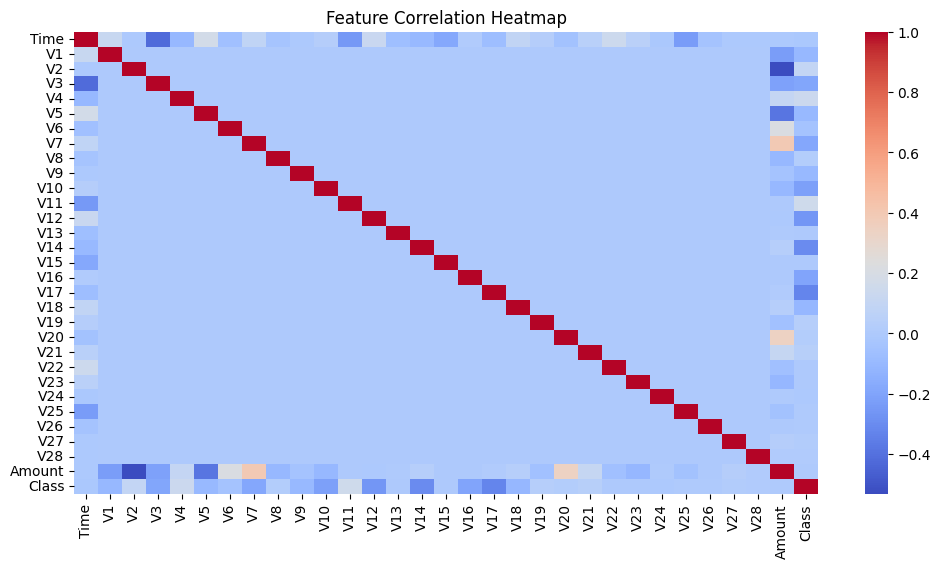

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

### Feature Correlation Heatmap - Insights

- The Class column (fraud indicator) shows some correlation with certain features.
- Some variables (e.g.V2, V4 and V11) appear to have higher absolute correlations with fraud.
- The majority of features have low correlations with each other, except for a few which show mild dependencies.
- Time and Amount have very little correlation with fraud.

### Highly correlated features for fraud detection.

In [51]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Get correlation of all features with the 'Class' column (fraud label)
fraud_correlation = correlation_matrix['Class'].sort_values(ascending=False)

# Display the top positively and negatively correlated features
print(fraud_correlation)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
Hour     -0.017109
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


### Feature Correlation Analysis for Fraud Detection

**Top Positively Correlated Features with Fraud**
- These features have a direct positive relationship with fraudulent transactions:

1. **V11** → **0.1549**  
2. **V4** → **0.1334**  
3. **V2** → **0.0913**  
4. **V21** → **0.0404**  
5. **V19** → **0.0348**  

**Top Negatively Correlated Features with Fraud**
- These features are inversely related to fraud (higher values might indicate lower fraud probability):

1. **V17** → **-0.3265**  
2. **V14** → **-0.3025**  
3. **V12** → **-0.2606**  
4. **V10** → **-0.2169**  
5. **V16** → **-0.1965**  

#### **Key Insights**
- **V11, V4, and V2** show the strongest positive correlation, suggesting that their increase may be associated with fraudulent activity.  
- **V17, V14, and V12** are highly negatively correlated, meaning lower values in these features might indicate fraud.  
- The **Amount** feature has a very low correlation (**0.0056**), meaning transaction value alone is not a strong fraud indicator.  
- The **Hour** of the transaction has a weak negative correlation (**-0.0171**), meaning time of day alone does not significantly predict fraud.  


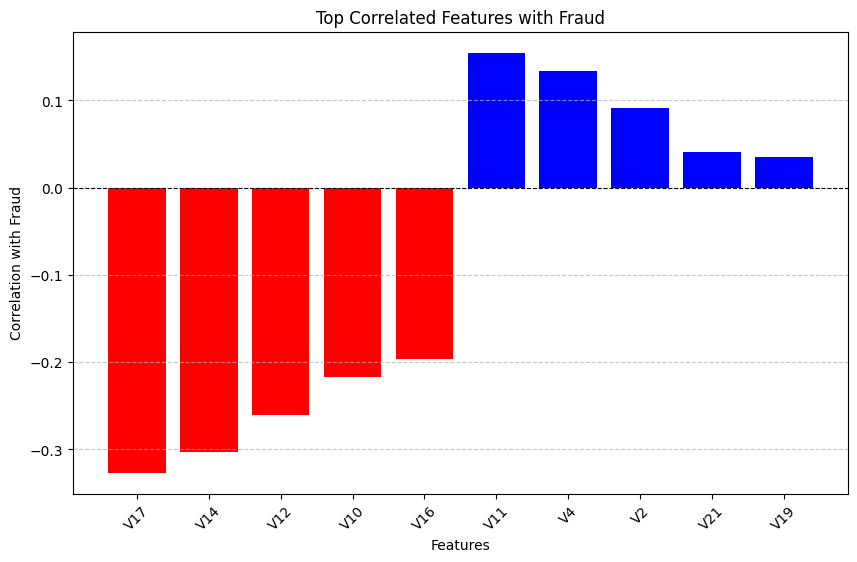

In [52]:
# Feature correlation values
features = ["V11", "V4", "V2", "V21", "V19", "V17", "V14", "V12", "V10", "V16"]
correlations = [0.1549, 0.1334, 0.0913, 0.0404, 0.0348, -0.3265, -0.3025, -0.2606, -0.2169, -0.1965]

# Sort features by correlation magnitude
features_sorted = [f for _, f in sorted(zip(correlations, features), key=lambda x: abs(x[0]), reverse=True)]
correlations_sorted = sorted(correlations, key=lambda x: abs(x), reverse=True)

# Plot bar chart
plt.figure(figsize=(10, 6))
colors = ['red' if c < 0 else 'blue' for c in correlations_sorted]  # Red for negative, blue for positive
plt.bar(features_sorted, correlations_sorted, color=colors)
plt.axhline(0, color='black', linewidth=0.8, linestyle="--")

# Labels and title
plt.xlabel("Features")
plt.ylabel("Correlation with Fraud")
plt.title("Top Correlated Features with Fraud")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

## **5. Data Preprocessing**

###  Separate Features (X) and Target (y)

In [4]:
X = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target variable

### Handling Class Imbalance

In [5]:
smote = SMOTE(sampling_strategy=1.0, random_state=42)  # 1:1 ratio of fraud to non-fraud
X_resampled, y_resampled = smote.fit_resample(X, y)

### Check Class Distribution

In [6]:
print("Before SMOTE:", Counter(y))
print("After SMOTE:", Counter(y_resampled))

Before SMOTE: Counter({0: 284315, 1: 492})
After SMOTE: Counter({0: 284315, 1: 284315})


### Splitting the Data

- Training set (70%) → Used to train the model.
- Test set (30%) → Used to evaluate model performance.

In [7]:
# Splitting the dataset into train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)

# Check the distribution after splitting
print("Train set class distribution:", Counter(y_train))
print("Test set class distribution:", Counter(y_test))

Train set class distribution: Counter({1: 199021, 0: 199020})
Test set class distribution: Counter({0: 85295, 1: 85294})


### **Feature Scaling**

#### Why Use Log Transformation & Robust Scaling?
- Since the dataset is highly skewed and contains outliers, we use:
- Robust Scaling → To scale features using median and IQR, reducing the impact of outliers.

In [8]:
# Initialize RobustScaler
scaler = RobustScaler()

# Fit on training data and transform both train & test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Feature Selection

#### Feature Importance with Random Forest

In [9]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=-1,
                       random_state=42)

In [10]:
# Get feature importance scores
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_model.feature_importances_})

In [11]:
# Sort and select top 20 features
top_features = feature_importances.sort_values(by='Importance', ascending=False).head(20)['Feature']
print("Top Features from Random Forest:", top_features.tolist())

Top Features from Random Forest: ['V14', 'V10', 'V4', 'V17', 'V3', 'V12', 'V16', 'V9', 'V2', 'V7', 'V11', 'V21', 'V27', 'V1', 'V8', 'V18', 'Time', 'V6', 'V13', 'V28']


In [14]:
# Convert scaled arrays back to DataFrame using X_train's column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Ensure top_features is a list (avoid pandas Series indexing issues)
top_features = list(top_features)

# Keep only top 20 features
X_train_rf = X_train_scaled_df[top_features]
X_test_rf = X_test_scaled_df[top_features]

print("Feature selection applied successfully!")

Feature selection applied successfully!


##**6. Model Building**

### Logistic Regression

In [15]:
# Initialize Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

In [16]:
# Train the model
log_reg.fit(X_train_rf, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [17]:
# Make predictions
y_pred = log_reg.predict(X_test_rf)
y_proba = log_reg.predict_proba(X_test_rf)[:, 1]  # Probabilities for class 1 (Fraud)

### Model Evaluation

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9796
Precision: 0.9917
Recall: 0.9673
F1-score: 0.9793

Confusion Matrix:
 [[84601   694]
 [ 2793 82501]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     85295
           1       0.99      0.97      0.98     85294

    accuracy                           0.98    170589
   macro avg       0.98      0.98      0.98    170589
weighted avg       0.98      0.98      0.98    170589



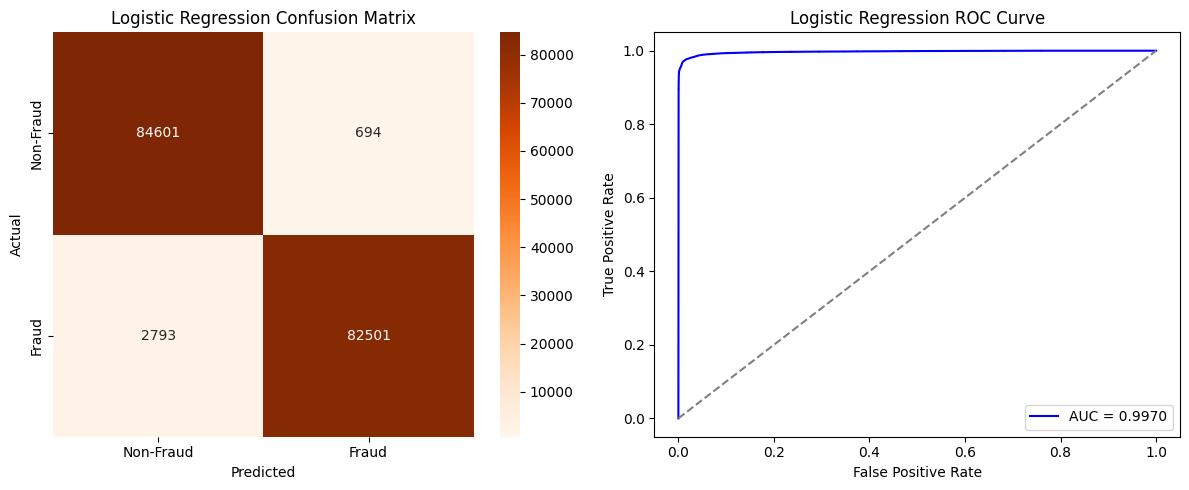

In [22]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Compute ROC curve and AUC
y_probs = log_reg.predict_proba(X_test_rf)[:, 1]  # Get probability scores for class 1 (fraud)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 📌 Plot Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"], ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Logistic Regression Confusion Matrix')

# 📌 Plot AUC-ROC Curve
axes[1].plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.4f}')
axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Logistic Regression ROC Curve')
axes[1].legend()

# Show plots
plt.tight_layout()
plt.show()


### Random Forest

In [25]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)

In [26]:
# Train the model
rf_model.fit(X_train_rf, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=-1,
                       random_state=42)

In [27]:
# Make predictions
y_pred_rf = rf_model.predict(X_test_rf)

### Model Evaluation

In [28]:
# Evaluate model performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

In [29]:
# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Classification Report
class_report_rf = classification_report(y_test, y_pred_rf)

In [30]:
# Print results
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")

print("\nConfusion Matrix:\n", conf_matrix_rf)
print("\nClassification Report:\n", class_report_rf)

Accuracy: 0.9917
Precision: 0.9984
Recall: 0.9851
F1-score: 0.9917

Confusion Matrix:
 [[85161   134]
 [ 1274 84020]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     85295
           1       1.00      0.99      0.99     85294

    accuracy                           0.99    170589
   macro avg       0.99      0.99      0.99    170589
weighted avg       0.99      0.99      0.99    170589



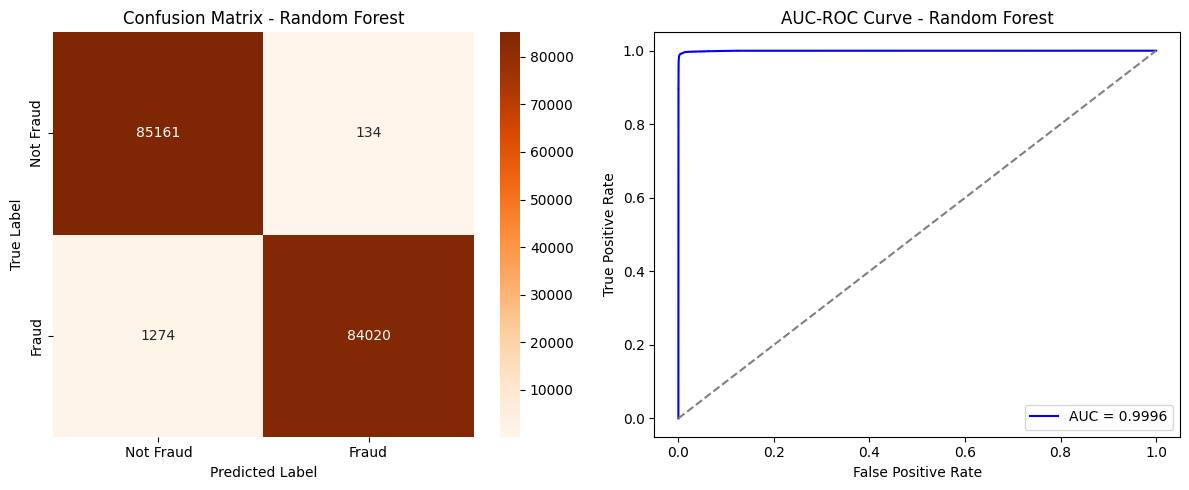

In [32]:
# Plot Confusion Matrix
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # First subplot
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Oranges", xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")

# Compute ROC Curve and AUC
y_prob_rf = rf_model.predict_proba(X_test_rf)[:, 1]  # Get probability scores
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)

# Plot AUC-ROC Curve
plt.subplot(1, 2, 2)  # Second subplot
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve - Random Forest")
plt.legend(loc="lower right")

# Show plots
plt.tight_layout()
plt.show()

### **XGBoost**

In [34]:
from xgboost import XGBClassifier
# Initialize and train XGBoost
xgb_model = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_rf, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [35]:
# Predictions
y_pred_xgb = xgb_model.predict(X_test_rf)
y_prob_xgb = xgb_model.predict_proba(X_test_rf)[:, 1]

### Evaluating XGBoost

In [36]:
# Compute metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

In [37]:
# Print results
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-score: {f1_xgb:.4f}\n")

print("Confusion Matrix:\n", conf_matrix_xgb)
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

Accuracy: 0.9987
Precision: 0.9980
Recall: 0.9994
F1-score: 0.9987

Confusion Matrix:
 [[85127   168]
 [   52 85242]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



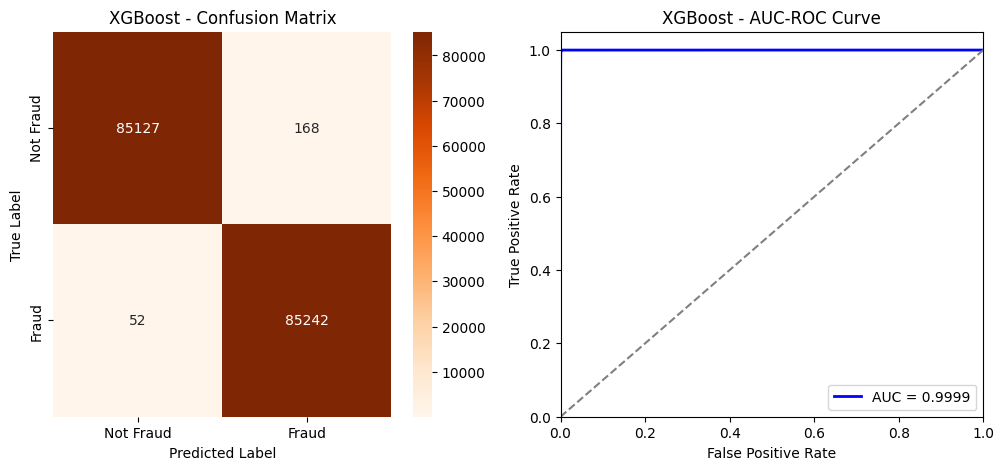

In [39]:
# Plot Confusion Matrix
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Oranges", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("XGBoost - Confusion Matrix")

# Plot AUC-ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)
roc_auc = auc(fpr, tpr)

plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color="blue", lw=2, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost - AUC-ROC Curve")
plt.legend(loc="lower right")

plt.show()

### Overfitting Analysis

In [40]:
print(f"Training Accuracy: {xgb_model.score(X_train_rf, y_train)}")
print(f"Test Accuracy: {xgb_model.score(X_test_rf, y_test)}")

Training Accuracy: 0.9990377875645976
Test Accuracy: 0.9987103506087731


### Checking Data Leakage

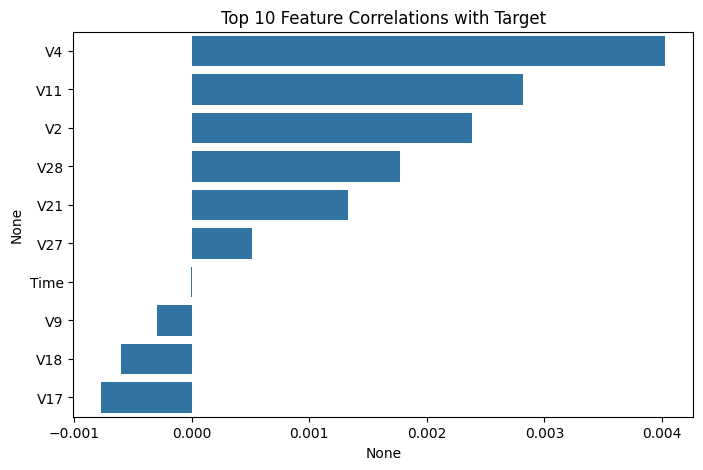

In [41]:
# Check correlation of features with target variable
correlations = X_train_rf.corrwith(y_train).sort_values(ascending=False)

# Plot top 10 correlated features
plt.figure(figsize=(8, 5))
sns.barplot(x=correlations[:10], y=correlations.index[:10])
plt.title("Top 10 Feature Correlations with Target")
plt.show()

In [42]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(xgb_model, X_train_rf, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

Cross-Validation Scores: [0.99809067 0.99845493 0.99858054 0.99879409 0.99824138]
Mean CV Accuracy: 0.9984
